how to build multiple decision tree out of this single data set below 
divide data set to different batch of random dataset and then build decison tree for each daatset whic has random sample 
called random forest 
every tree has own decision  and then pass to mjority vote to genrate final decision 

In [1]:
import pandas as pd 
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

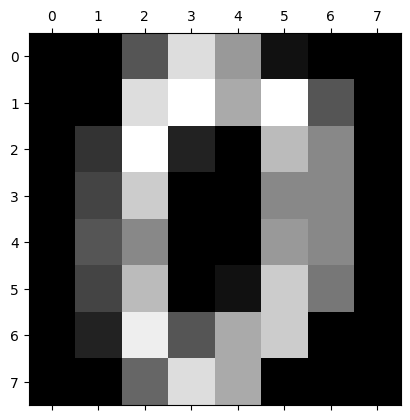

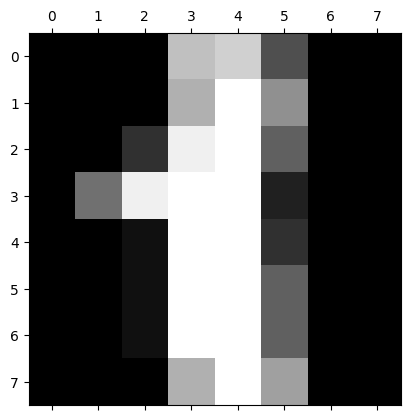

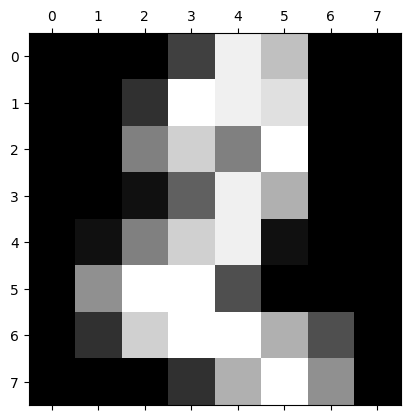

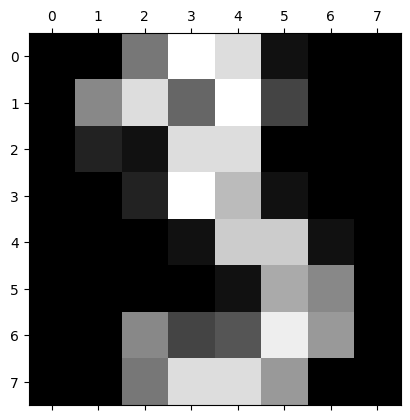

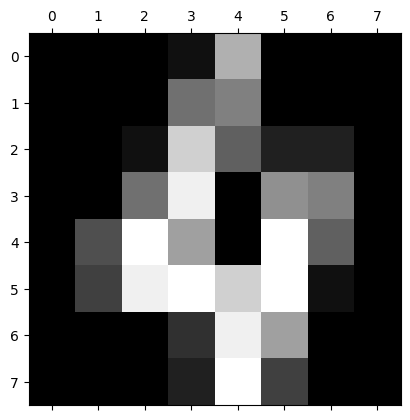

In [3]:
import matplotlib.pyplot as plt
plt.gray()#make follwing image gray scale
for i in range(5):
    plt.matshow(digits.images[i])

make data frame for digits data 

In [4]:
df=pd.DataFrame(digits.data)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,digits.target,test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=30) #n_estimotor has tree 
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [15]:
model.score(x_test,y_test)

0.9722222222222222

In [16]:
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 30,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  3,  0, 34]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

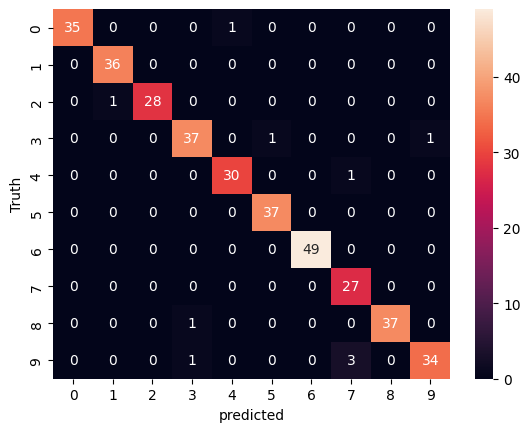

In [17]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")